# Wavelet Analysis: Part One

## Background and Motivation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile
import math
import pywt
plt.style.use('dark_background')

In [2]:
# Load .wav file data
sample_rate, signal_data = wavfile.read('jingle_bells.wav')

# Frequency determines the chord

duration = len(signal_data) / sample_rate
time = np.arange(0, duration, 1/sample_rate) 

print(f"Sample Rate: {sample_rate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signal_data)} / {sample_rate}")
print(f"len of audio file = {len(signal_data)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 15.6991 seconds (sample rate and audioBuffer = 156991 / 10000
len of audio file = 156991
Total Length in time = 156991


In [3]:
# Plot .wav file
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signal_data})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


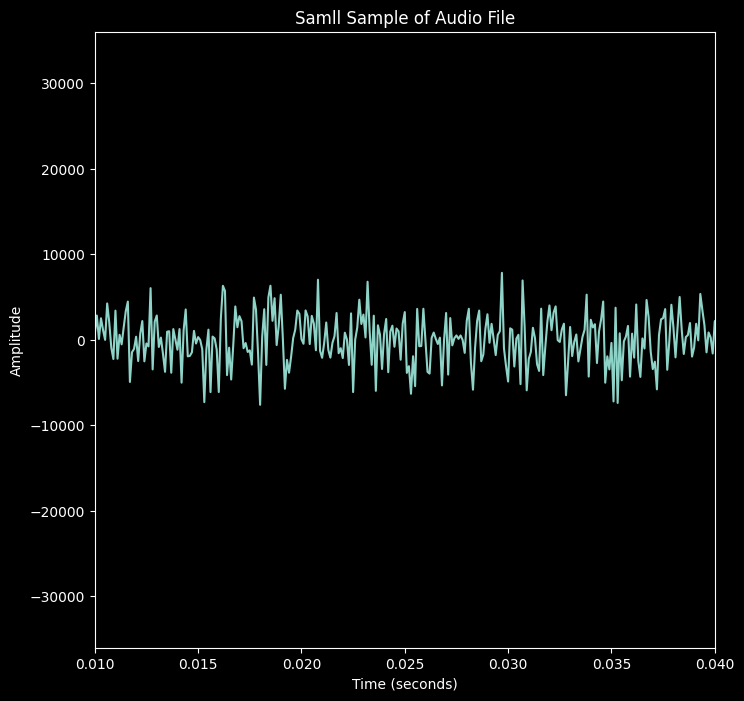

In [4]:
# Plot .wav file
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title("Samll Sample of Audio File")
ax.set_xlim(signal_df["time (seconds)"][100], signal_df["time (seconds)"][400])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.savefig("jingle_bells_sample.png")
plt.show()

In [5]:
# note frequency in hz
a_freq = 440
print(f"A note {a_freq} hz")
b_freq = 494
print(f"B note {b_freq} hz")
c_freq = 261
print(f"C note {c_freq} hz")
d_freq = 293
print(f"D note {d_freq} hz")
e_freq = 330
print(f"E note {e_freq} hz")
f_freq = 350
print(f"F note {f_freq} hz")
g_freq = 392
print(f"G note {g_freq} hz")

A note 440 hz
B note 494 hz
C note 261 hz
D note 293 hz
E note 330 hz
F note 350 hz
G note 392 hz


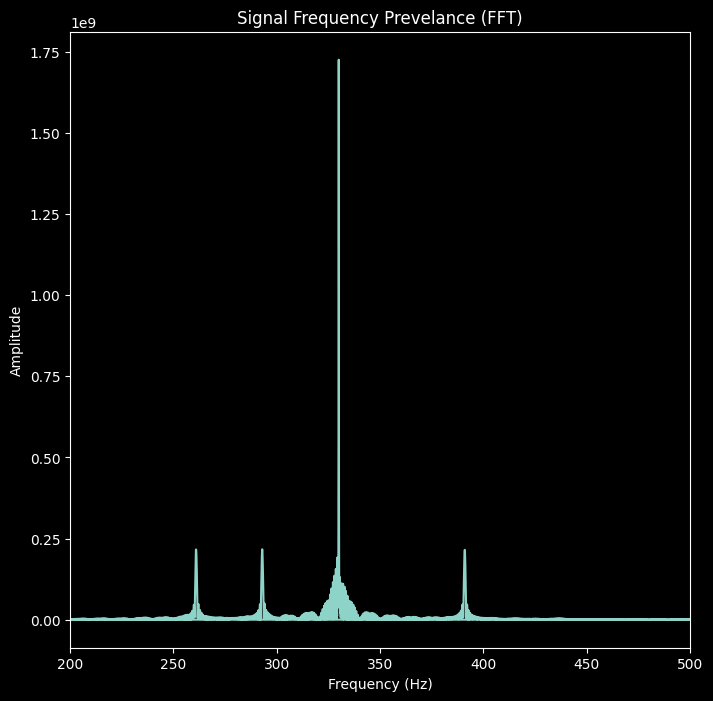

In [6]:
# Fast Fourier Transform

# Collect Fast Fourier Transform Data
fourier_transform = abs(fft(signal_data))
freqs = fftfreq(len(fourier_transform), (1/sample_rate))

# Plot Frequency Prevelance
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig("fft_1.png")
plt.show()

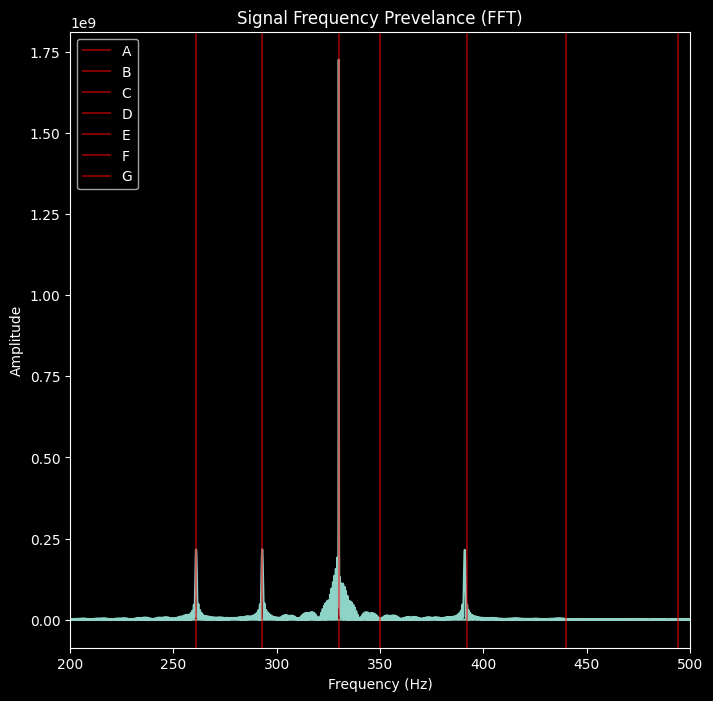

In [7]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# A note: 440 hz
plt.axvline(x=a_freq, color="red", label="A",alpha=0.5)
# B Note: 494 hz
plt.axvline(x=b_freq, color="red", label="B",alpha=0.5)
# C Note: 261 hz
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=d_freq, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=e_freq, color="red", label="E",alpha=0.5)
# F Note: 350 hz
plt.axvline(x=f_freq, color="red", label="F",alpha=0.5)
# G Note: 392 hz
plt.axvline(x=g_freq, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("fft_2.png")
plt.show()

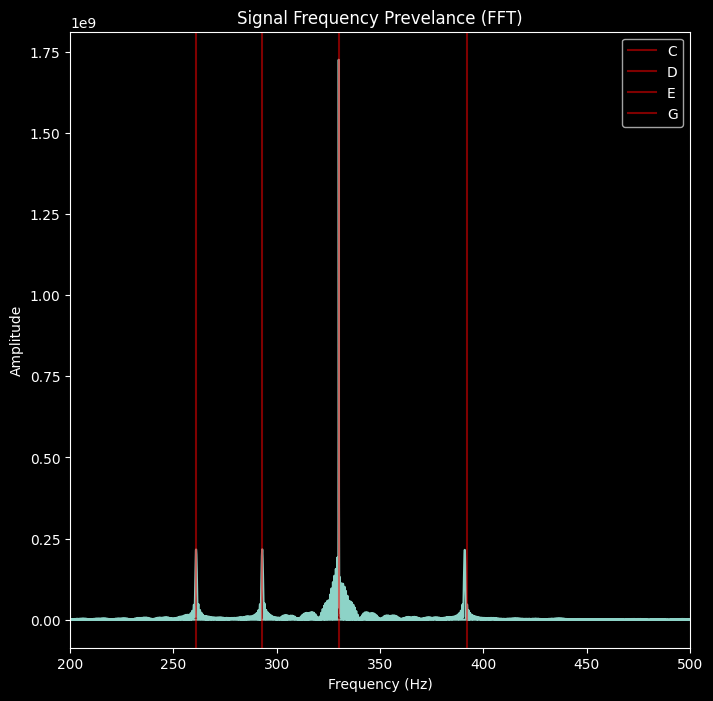

In [8]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# C Note: 261 hz
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=d_freq, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=e_freq, color="red", label="E",alpha=0.5)
# G Note: 391 hz
plt.axvline(x=g_freq, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("fft_3.png")
plt.show()

## Wavelet

156991


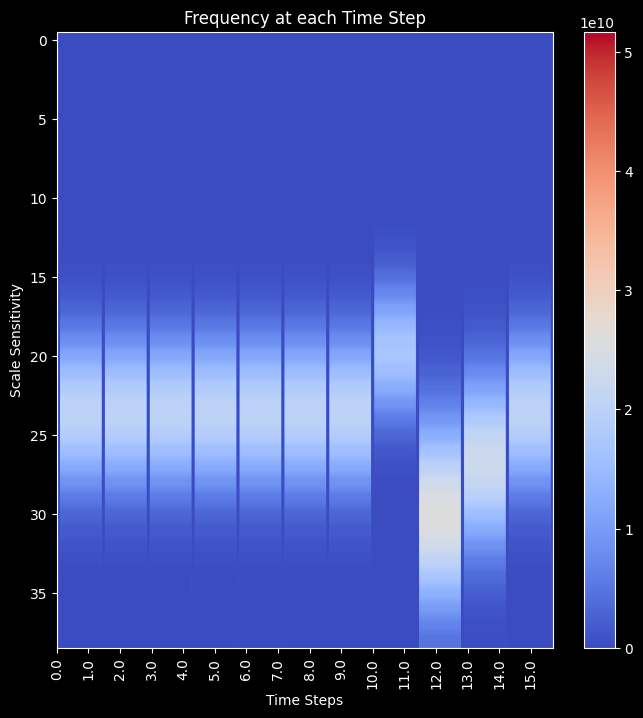

In [13]:
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = wavelet_mother)

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

fig, ax = plt.subplots(figsize=(8, 8))

end_time = len(signal_data) * sample_rate
x_tickrange = np.arange(0, end_time, sample_rate)
print(len(x_tickrange))
plt.xticks(range(len(x_tickrange))[::10000], x_tickrange[::10000])

plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.xticks(rotation=90)

plt.colorbar()
plt.savefig("p1_jingle_bells_wavelet.png")
plt.show()

In [10]:
sample_rate = 1/sample_rate

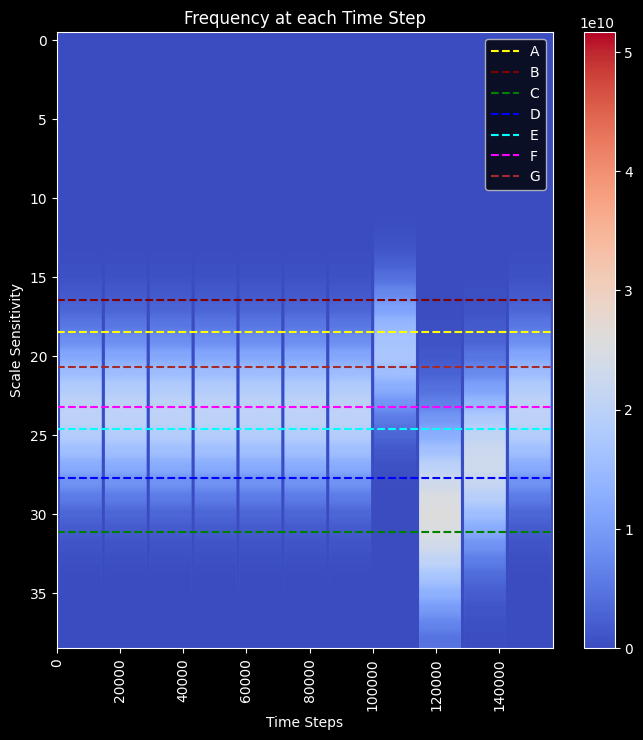

In [11]:
# note frequency in hz
fig, ax = plt.subplots(figsize=(8, 8))
a_note = pywt.frequency2scale(wavelet_mother, a_freq*sample_rate)
plt.axhline(y=a_note, color='yellow', linestyle='--', label='A')
b_note = pywt.frequency2scale(wavelet_mother, b_freq*sample_rate)
plt.axhline(y=b_note, color="maroon", linestyle='--', label='B')
c_note = pywt.frequency2scale(wavelet_mother, c_freq*sample_rate)
plt.axhline(y=c_note, color='green', linestyle='--', label='C')
d_note = pywt.frequency2scale(wavelet_mother, d_freq*sample_rate)
plt.axhline(y=d_note, color='blue', linestyle='--', label='D')
e_note = pywt.frequency2scale(wavelet_mother, e_freq*sample_rate)
plt.axhline(y=e_note, color='cyan', linestyle='--', label='E')
f_note = pywt.frequency2scale(wavelet_mother, f_freq*sample_rate)
plt.axhline(y=f_note, color='fuchsia', linestyle='--', label='F')
g_note = pywt.frequency2scale(wavelet_mother, g_freq*sample_rate)
plt.axhline(y=g_note, color='brown', linestyle='--', label='G')

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.xticks(rotation=90)
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.legend()
plt.savefig("p1_jingle_bells_wavelet_freq.png")
plt.show()

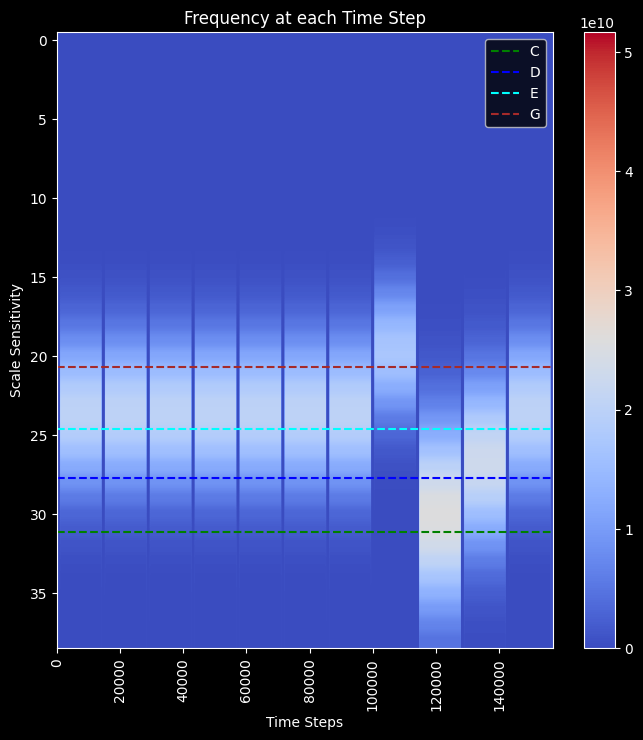

In [12]:
# note frequency in hz
fig, ax = plt.subplots(figsize=(8, 8))
c_note = pywt.frequency2scale(wavelet_mother, c_freq*sample_rate)
plt.axhline(y=c_note, color='green', linestyle='--', label='C')
d_note = pywt.frequency2scale(wavelet_mother, d_freq*sample_rate)
plt.axhline(y=d_note, color='blue', linestyle='--', label='D')
e_note = pywt.frequency2scale(wavelet_mother, e_freq*sample_rate)
plt.axhline(y=e_note, color='cyan', linestyle='--', label='E')
g_note = pywt.frequency2scale(wavelet_mother, g_freq*sample_rate)
plt.axhline(y=g_note, color='brown', linestyle='--', label='G')

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.xticks(rotation=90)
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.legend()
plt.savefig("p1_jingle_bells_wavelet_freq2.png")
plt.show()